In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

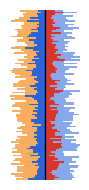

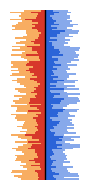

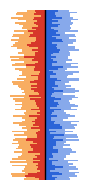

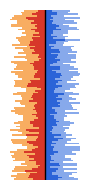

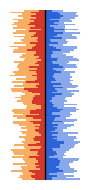

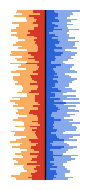

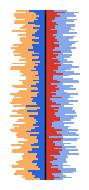

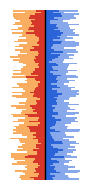

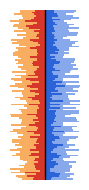

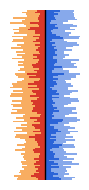

In [2]:
def get_rgb(s):
    return tuple([int(v) / 255 for v in s.split(",")])
# crick, watson, paternal, maternal
colors = ["135,169,235", "248,173,97", "43,100,216", "215,55,42"]
colors = list(map(get_rgb, colors))

np.random.seed(0)
nbin = 100
for i in range(10):
    plt.figure(figsize=(1, 2))
    xs1 = np.random.rand(nbin) * 10 + 10
    xs2 = np.random.rand(nbin) * 10 + 10
    xs3 = (np.random.rand(nbin) * 0.4 + 0.2) * xs1
    xs4 = (np.random.rand(nbin) * 0.4 + 0.2) * xs2
    ys = np.arange(nbin)
    plt.barh(ys, xs1, height=1, color=colors[0])
    plt.barh(ys, -xs2, height=1, color=colors[1])
    color1, color2 = colors[2], colors[3]
    if np.random.rand() < 0.5:
        color1, color2 = color2, color1
    plt.barh(ys, xs3, height=1, color=color1)
    plt.barh(ys, -xs4, height=1, color=color2)
    plt.plot([0, 0], [-0.5, nbin - 0.5], lw=1, color="black")
    plt.xlim(-20, 20)
    plt.ylim(0 - 0.5, nbin - 0.5)
    for loc in ["top", "left", "right", "bottom"]:
        plt.gca().spines[loc].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig("figures/cluster_wc_pattern_%d.pdf" % i, dpi=300)

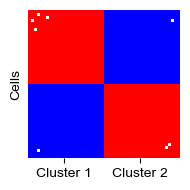

In [3]:
count = 50
m = np.zeros((count, count))
for i in range(count):
    for j in range(count):
        if i == j:
            m[i][j] = 1
        elif (i < 25) is (j < 25):
            m[i][j] = 1
        else:
            m[i][j] = -1

pairs = [[2, 6], [47, 3], [46, 45], [1, 3]]
for i, j in pairs:
    m[i][j] = 0
    m[j][i] = 0
            
plt.figure(figsize=(2, 2))
sns.heatmap(m, cmap="bwr", cbar=False)
plt.yticks([])
plt.ylabel("Cells")
plt.xticks([12, 37], ["Cluster 1", "Cluster 2"], rotation=0)
plt.tight_layout()
plt.savefig("figures/cluster_heatmap_pattern.pdf", dpi=300)